## Install miniconda & mamba

To get miniconda on mac using the terminal:




Conda has slow package management, use mamba instead:

Also add some package channels to conda (last added channel has highest priority):

## Create environments

After installing mamba. Avoid installing in the "base" environment, which is the default. To change the default:

Create virtual environments with conda. Every env will be created in folder user/miniconda3/envs.

Other environment commands

Example for env I created:

pandas is for dataframes, seaborn for graphical stuff, scikit-learn for the sklearn-functions

See your current active environment (marked with *):

In [ ]:
conda info --envs

# conda environments:
#
                         /Users/fabianburki/Library/r-miniconda
                         /Users/fabianburki/Library/r-miniconda/envs/r-reticulate
base                     /Users/fabianburki/miniconda3
first-env             *  /Users/fabianburki/miniconda3/envs/first-env


Note: you may need to restart the kernel to use updated packages.


## Jupyter notebooks locally

To use jupyter notebooks locally:

Then cd to directory where you want your notebook and type, which will start a browser session:

Or use jupyter-extension in vscode. \
https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter

## Start tensorflowing
Tensorflow api doc: https://www.tensorflow.org/api_docs/python/tf

In [1]:
import tensorflow as tf
print(('tensorflow version: {0}').format(tf.__version__))

2024-04-04 13:56:40.544350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow version: 2.11.0


### Some functions of tensorflow: creating constants, variables, zero-arrays and math operations

In [2]:
# create constant tensor
A = tf.constant([[4,3],[6,1]])
A # this works for printing in jupyter notebook

2024-04-04 13:56:54.981082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 3],
       [6, 1]], dtype=int32)>

In [5]:
V = tf.Variable([[8,3,4],[2,6,1]])
V

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[8, 3, 4],
       [2, 6, 1]], dtype=int32)>

In [6]:
tensor = tf.zeros(shape=[4,6],dtype=tf.int32)
tensor

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)>

tf uses int32, to control the precision so we get the same results on different plattforms. 0s & 1s are mostly used for masking. Tensors are usually initialized with random numbers.

In [7]:
# to flip column and rows
a = tf.transpose(A)
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 6],
       [3, 1]], dtype=int32)>

In [8]:
# matrix multiplication
AV = tf.matmul(A,V)
AV

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[38, 30, 19],
       [50, 24, 25]], dtype=int32)>

### Preparing for deep learning

In [2]:
import datetime, warnings, scipy
import pandas as pd # pandas for data frames
import numpy as np # numpy for numbers arrays
import seaborn as sns # for graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
# params for graphics
plt.rcParams["patch.force_edgecolor"]=True
plt.style.use('fivethirtyeight')
mpl.rc('patch',edgecolor = 'dimgray', linewidth=1)
# other stuff happening
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="last_expr"
pd.options.display.max_columns=50
# for jupyter notebook some matplotlib code is needed
%matplotlib inline 
warnings.filterwarnings("ignore") # don't disable warnings on serious projects

### Importing keras and sklearn

In [3]:
import math
# choose the model
from keras.models import Sequential
# choose the layers
from keras.layers import Dense # uses ReLU per default
from keras.layers import LSTM # long short term memory
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to preprocess the data
from sklearn.metrics import mean_squared_error # to compute the errors

Read air quality csv-file:

In [11]:
df = pd.read_csv('air_quality.csv',sep=' ') # if the csv is in the same directory as the jupyter notebook
df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN


### Preprocessing the data

In [12]:
# Convert TIME to datetime format:
def combine_date(df, tab_name):
    list_tab = []
    for i in range(df. shape[0]):
        list_tab.append(df.loc[i, 'Tanggal'] + 'T' + df.loc[i, tab_name][0:2])
    return np.array(list_tab, dtype='datetime64')
df['Datetime'] = combine_date(df,'Jam')
# Convert into houriy data
df = df[['Datetime','O3','CO','NO2','SO2','NO','CO2','VOC','PM1','PM2.5','PM4','PM10','TSP','TEMP','HUM','WS','WD','ISPU']]
df2 = df.groupby(['Datetime']).mean()
df2.head()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
Datetime,,,,,,,,,,,,,,,,,
2019-05-19 00:00:00,11.797500,0.667500,15.720,9.7300,34.32175,399.135000,439.22300,0.0,0.0,0.0,7.157500,0.0,37.225000,171.850000,0.28125,3.500000,10.000000
2019-05-19 01:00:00,3.816667,0.373333,22.600,20.0900,39.82100,388.536667,250.39400,0.0,0.0,0.0,3.293333,0.0,20.966667,95.033333,0.67500,4.666667,12.666667
2019-05-19 02:00:00,6.450000,0.332500,24.130,26.3100,51.29325,396.242500,251.04575,0.0,0.0,0.0,6.487500,0.0,20.150000,97.500000,0.09375,3.750000,16.250000
2019-05-19 03:00:00,4.740000,0.180000,25.975,24.3900,43.51850,401.355000,252.24875,0.0,0.0,0.0,4.700000,0.0,19.850000,100.000000,0.07500,5.000000,15.000000
2019-05-19 04:00:00,19.692500,0.202500,20.395,18.6225,53.37925,399.335000,694.23975,0.0,0.0,0.0,5.262500,0.0,53.475000,272.500000,0.18750,5.250000,13.250000


In [14]:
df2.describe()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,8.538909,0.233172,16.681910,12.013894,37.086256,394.616480,260.053778,0.309564,0.383692,0.451982,6.157770,0.562012,25.266942,77.634191,24.291226,7.129031,10.097848
std,3.997292,0.388102,5.373487,4.411251,12.521778,4.180224,60.773321,2.286104,2.874126,3.378291,4.149511,4.184787,6.707977,29.743129,51.993683,3.523245,5.049788
min,0.270000,0.010000,2.040000,2.162500,3.128750,380.420000,187.518000,0.000000,0.000000,0.000000,0.885000,0.000000,11.250000,26.866667,0.000000,0.000000,4.250000
25%,5.881667,0.083333,13.010000,9.015000,28.443500,391.830000,247.798333,0.000000,0.000000,0.000000,4.340000,0.000000,21.266667,57.850000,0.237500,4.666667,8.166667
50%,7.813333,0.160000,15.916667,11.730000,39.252250,394.602000,250.926250,0.000000,0.000000,0.000000,5.571667,0.000000,24.100000,77.083333,1.312500,5.833333,9.500000
75%,10.373333,0.296667,19.935000,14.595000,46.015500,397.415000,253.286667,0.000000,0.000000,0.000000,7.090000,0.000000,28.400000,94.066667,5.075000,10.500000,11.000000
max,33.741667,13.950000,99.600000,46.290000,194.554000,408.820000,1240.713500,51.600000,68.700000,79.800000,91.600000,92.900000,124.600000,313.400000,199.200000,15.000000,156.500000


In [19]:
# Calculate quantile for each variable
def calculate_quantile (i, df2):
    Q1 = df2[[i]].quantile(0.25)[0]
    Q3 = df2[[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min = df2[[i]].min()[0]
    max = df2[[i]].max()[0]
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    return Q1,Q3,min,max,min_IQR,max_IQR

# delete first and Last rows to avoid missing value extrapolation
df2. drop(index=[df2.index[0],df2.index[df2.shape[0]-1]],inplace=True)
# find and interpolate the outliers
for i in df2.columns:
    print('\nAttribute-',i,':')
    Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, df2)
    print ('Q1 = %.2f' % Q1)
    print('Q3 = %.2f' % Q3)
    print('min_IQR = %.2f' % min_IQR)
    print('max_IQR = %.2f' % max_IQR)
    if(min < min_IQR):
        print('--> outlier found below = %.2f' % min)
    if(max > max_IQR):
        print('--> outlier found above = %.2f' % max)



Attribute- O3 :
Q1 = 5.88
Q3 = 10.37
min_IQR = -0.86
max_IQR = 17.11
--> outlier found above = 33.74

Attribute- CO :
Q1 = 0.08
Q3 = 0.30
min_IQR = -0.24
max_IQR = 0.62
--> outlier found above = 13.95

Attribute- NO2 :
Q1 = 13.01
Q3 = 19.93
min_IQR = 2.62
max_IQR = 30.32
--> outlier found below = 2.04
--> outlier found above = 99.60

Attribute- SO2 :
Q1 = 8.99
Q3 = 14.57
min_IQR = 0.63
max_IQR = 22.93
--> outlier found above = 46.29

Attribute- NO :
Q1 = 28.44
Q3 = 46.02
min_IQR = 2.09
max_IQR = 72.37
--> outlier found above = 194.55

Attribute- CO2 :
Q1 = 391.84
Q3 = 397.40
min_IQR = 383.49
max_IQR = 405.75
--> outlier found below = 380.42
--> outlier found above = 408.82

Attribute- VOC :
Q1 = 247.81
Q3 = 253.30
min_IQR = 239.57
max_IQR = 261.53
--> outlier found below = 187.52
--> outlier found above = 1240.71

Attribute- PM1 :
Q1 = 0.00
Q3 = 0.00
min_IQR = 0.00
max_IQR = 0.00
--> outlier found above = 51.60

Attribute- PM2.5 :
Q1 = 0.00
Q3 = 0.00
min_IQR = 0.00
max_IQR = 0.00
--> 

In [20]:
# getting rid of outliers
def convert_nan (x, max_IQR=max_IQR, min_IQR=min_IQR):
    if ((x > max_IQR) | (x < min_IQR)):
        x = np.nan
    else:
        x=x
    return x
def convert_nan_HUM (x, max_IQR=100.0, min_IQR=min_IQR):
    if ((x > max_IQR) | (x < min_IQR)):
        x = np.nan
    else:
        x=x

if (i=='HUM'):
    df2[i] = df2[i].map(convert_nan_HUM)
    df2[i] = df2[i].interpolate (method='linear') # give outliers new values by interpolation
if (i !='HUM'):
    df2[i] = df2[i].map(convert_nan)
    df2[i]=df2[i].interpolate(method='linear') # give outliers new values by interpolation
if (len(df2[df2[i].isnull()][i]) == 0):
    print('######## Outliers have been interpolated (been given new values) #######')

######## Outliers have been interpolated #######


In [21]:
# Log transformation to deal with skewed data (domain-specific knowledge to do that)
dataset = np.log1p(df2[['TEMP']].values)
dataset.shape

(1729, 1)

<Figure size 1200x500 with 0 Axes>

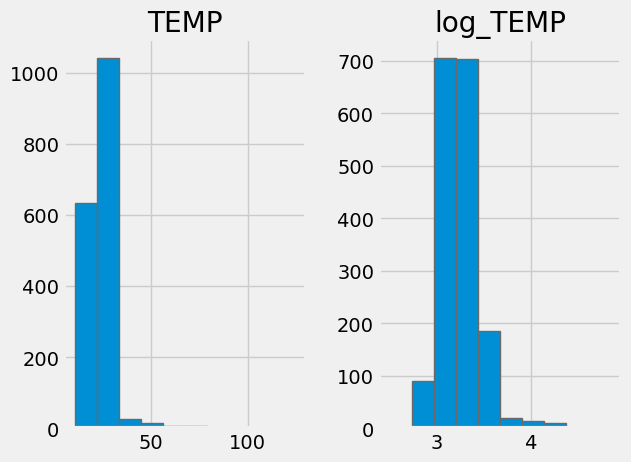

In [24]:
# Create new dataframe to compare the original vs Log transform data
dist_df = pd.DataFrame ({'TEMP': df2['TEMP'].values,'log_TEMP' : dataset[:,0]})

# Histogram plot original vs Log transform data
plt.figure(figsize=(12,5))
dist_df.hist();

In [25]:
# Split the dataset into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1296 433


In [28]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY. append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape train and test data
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print ('Shape of trainX :', trainX.shape)
print ('Shape of trainY :', trainY.shape)
print ('Shape of testX :', testX.shape)
print ('Shape of testY :', testY.shape)

Shape of trainX : (1294, 1)
Shape of trainY : (1294,)
Shape of testX : (431, 1)
Shape of testY : (431,)


In [5]:
# march22_session
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import svm
mnist = fetch_openml('mnist_784')